In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [31]:
df = pd.read_csv('3.1 loan_data_2007_2014.csv')

C:\Users\sorra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [36]:
df['good_bad'].value_counts()[1]

54174

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


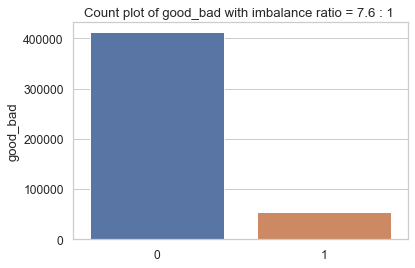

In [45]:
import math

df['good_bad'] = np.where(df['loan_status'].isin(['Current', 'Fully Paid', 
                                                                    'In Grace Period']), 0, 1)

sns.barplot(df['good_bad'].value_counts().keys(), df['good_bad'].value_counts())

ratio = round(df['good_bad'].value_counts()[0]/ df['good_bad'].value_counts()[1], 1)

plt.title(f'Count plot of good_bad with imbalance ratio = {ratio} : 1 ')
plt.show()

# Univariate analysis

- Check distribution
- Filling missing values

In [5]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [37]:
(~df['loan_amnt'].isnull()).sum()

466285

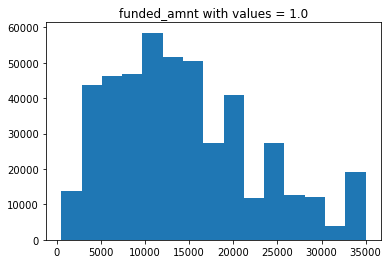

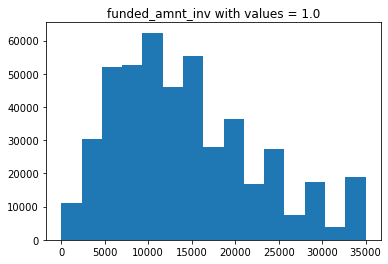

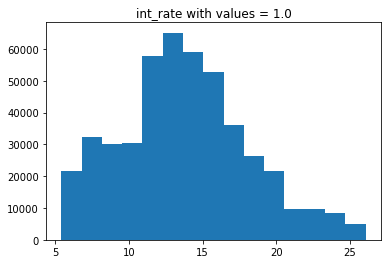

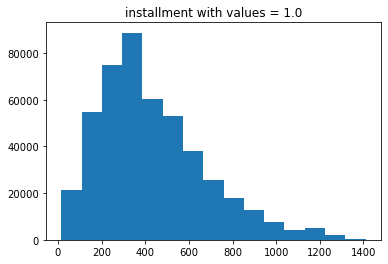

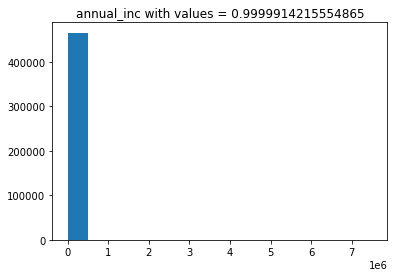

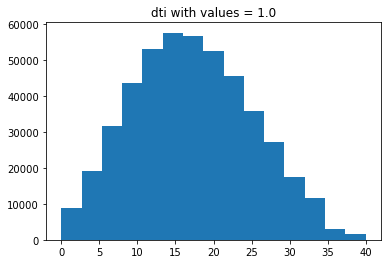

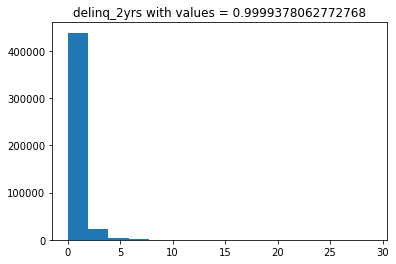

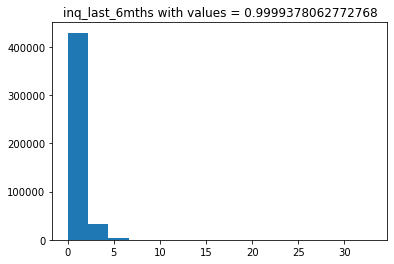

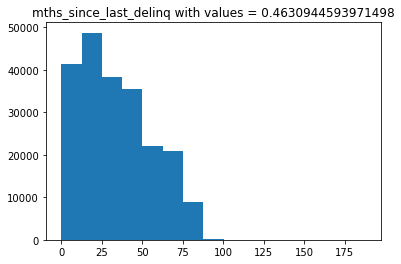

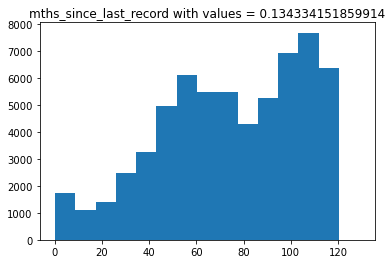

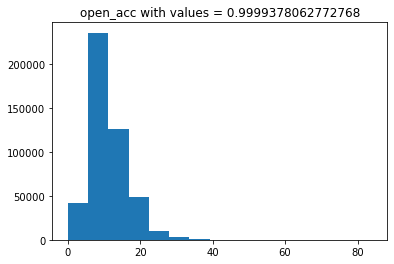

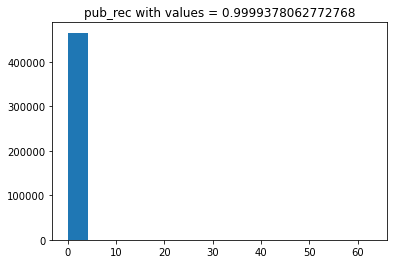

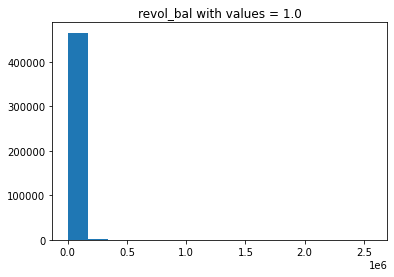

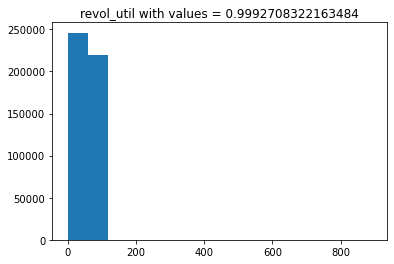

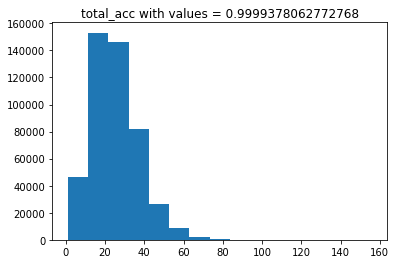

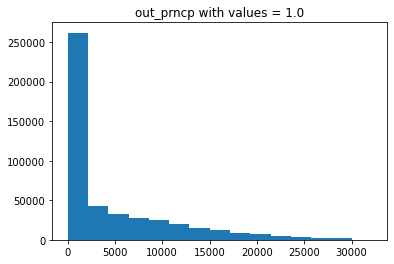

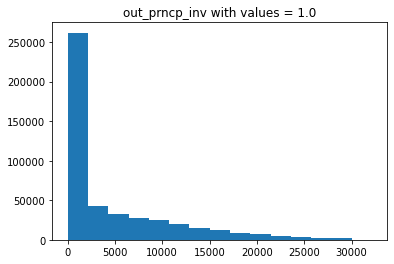

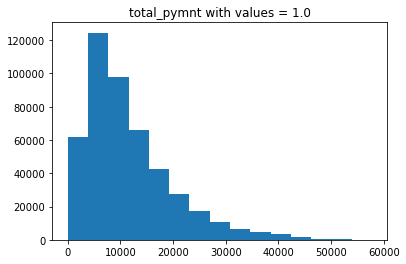

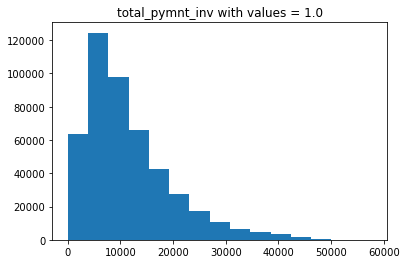

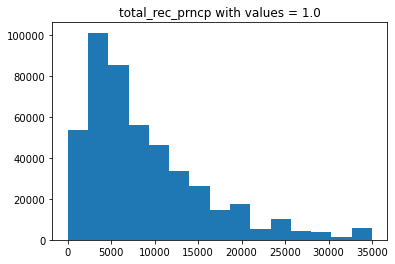

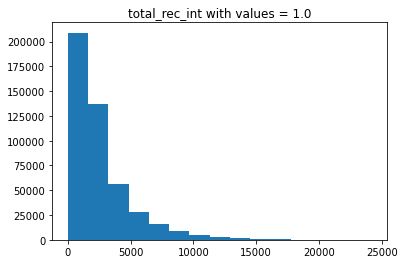

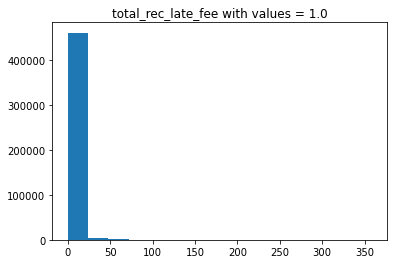

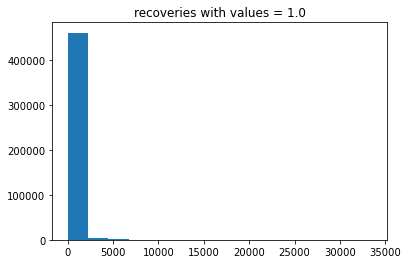

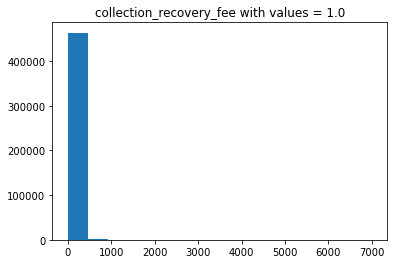

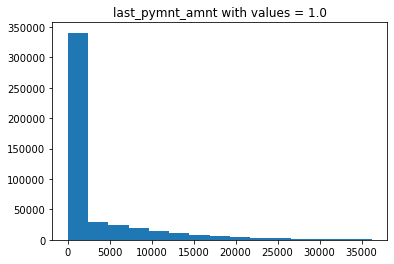

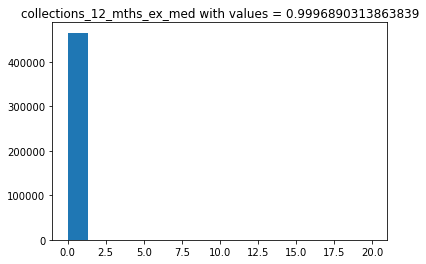

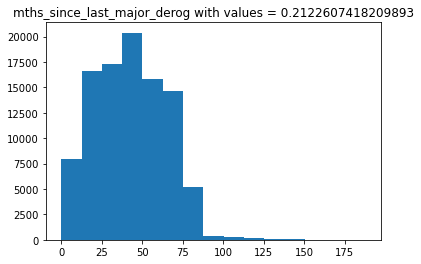

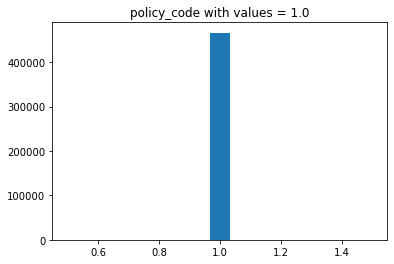

C:\Users\sorra\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\sorra\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


Error : annual_inc_joint
Error : dti_joint
Error : verification_status_joint


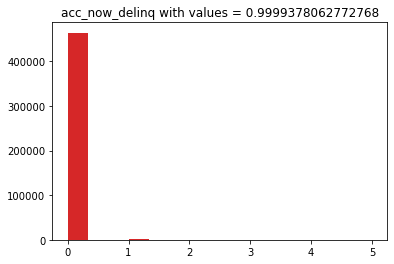

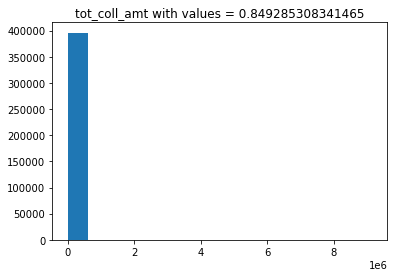

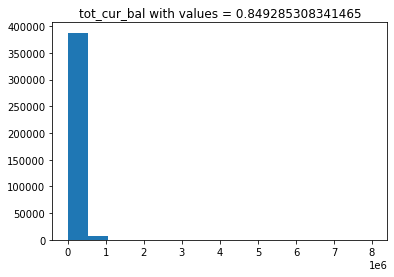

Error : open_acc_6m
Error : open_il_6m
Error : open_il_12m
Error : open_il_24m
Error : mths_since_rcnt_il
Error : total_bal_il
Error : il_util
Error : open_rv_12m
Error : open_rv_24m
Error : max_bal_bc
Error : all_util


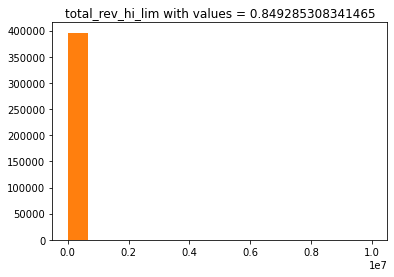

Error : inq_fi
Error : total_cu_tl
Error : inq_last_12m


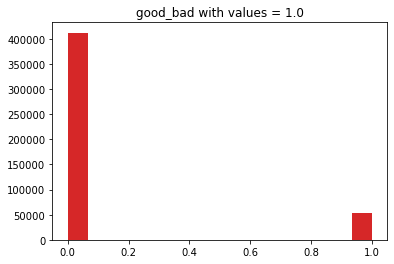

In [44]:
# integer of float columns

for i in df.columns:
    if i in ['Unnamed: 0', 'id', 'member_id', 'loan_amnt']:
        pass
    
    elif 'int' in str(df[i].dtypes) or 'float' in str(df[i].dtypes):
        
        try:
            n = (~df[i].isnull()).sum()
            per_n = n/df.shape[0]

            plt.hist(df[i], bins = 15)
            plt.title(f'{i} with values = {per_n}')
            plt.show()
            
        except:
            print(f'Error : {i}')

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


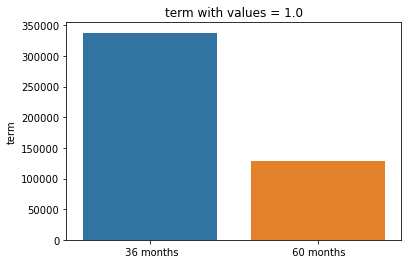

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


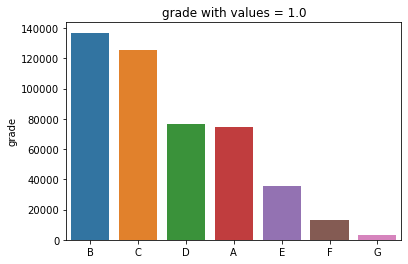

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


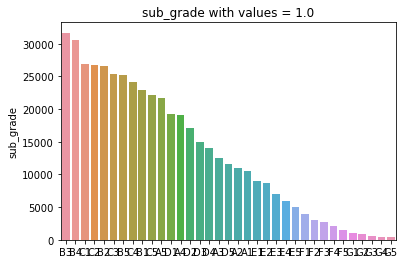

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


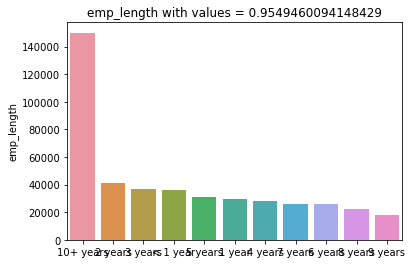

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


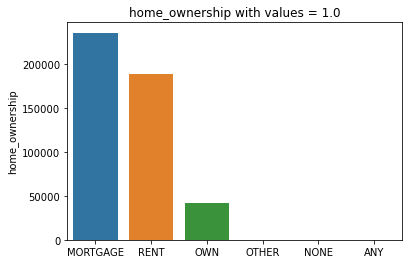

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


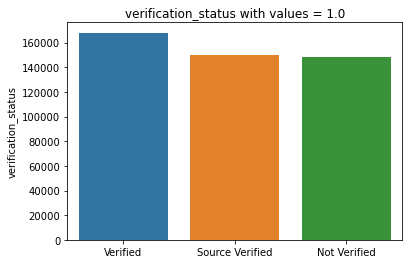

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


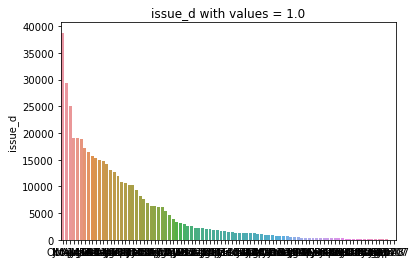

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


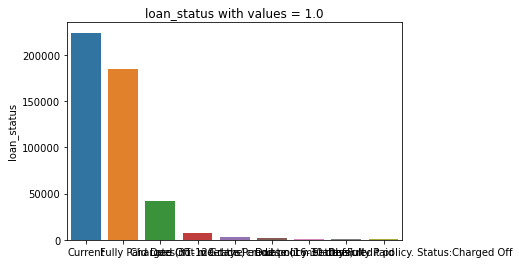

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


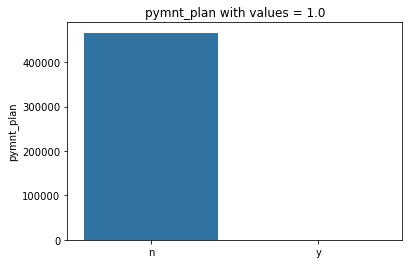

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


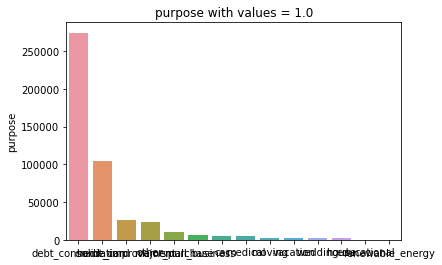

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Error : title


C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


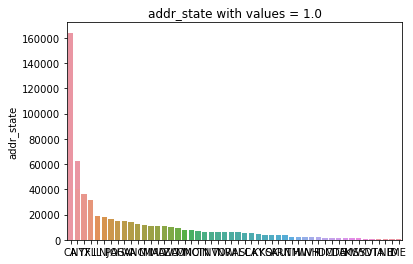

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


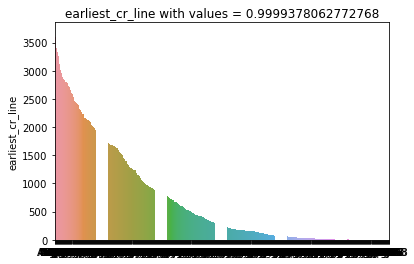

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


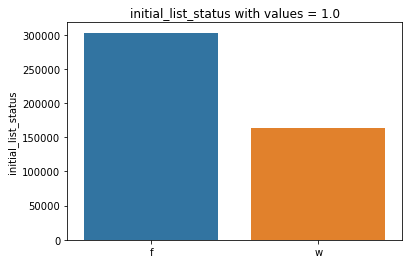

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


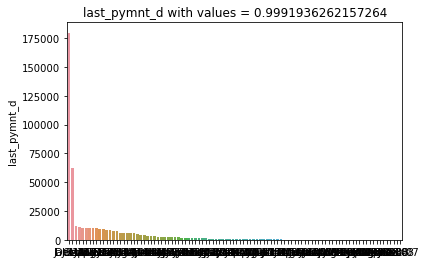

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


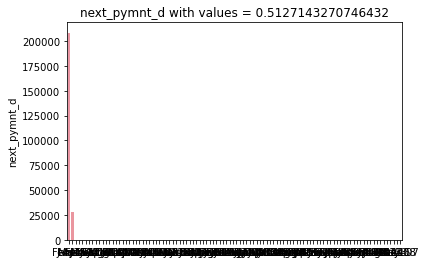

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


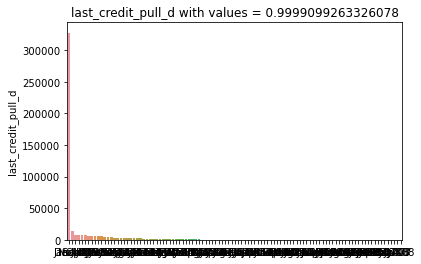

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


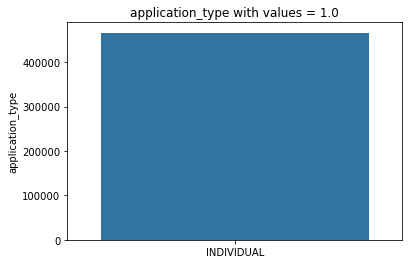

In [6]:
for i in df.columns:
    if i in ['Unnamed: 0', 'id', 'member_id', 'loan_amnt']:
        pass
    
    elif 'int' not in str(df[i].dtypes) and 'float' not in str(df[i].dtypes) and i not in ['url', 'desc', 'zip_code', 'emp_title']:
        
        try:
            n = (~df[i].isnull()).sum()
            per_n = n/df.shape[0]
            
            
            sns.barplot(df[i].value_counts().keys(), df[i].value_counts())
            plt.title(f'{i} with values = {per_n}')
            plt.show()
            
        except:
            print(f'Error : {i}')

In [5]:
def drop_columns(df):
    
    columns = ['mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint',
               'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
               'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
               'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
               'total_cu_tl', 'inq_last_12m',
              
               'emp_title', 'issue_d', 'pymnt_plan', 'url', 'desc', 'zip_code', 'loan_status', 'title',
              'earliest_cr_line', 'addr_state', 'application_type', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
    
    df = df.drop(columns = columns)
    
    return df
    

def fill_columns(df):
    
    for i in df.columns:
        
        if i in ['mths_since_last_delinq', 'open_acc', 'total_acc']:

            df[i] = df[i].fillna(df[i].mean())

        elif i in ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util',
                  'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
                   'total_rev_hi_lim']:

            df[i] = df[i].fillna(df[i].median())

        elif i in []:

            df[i] = df[i].fillna(df[i].mode())

        elif i in ['emp_length']:

            df[i] = df[i].fillna('UNKNOWN')
    
    return df

In [6]:
df_drop = drop_columns(df)
df_fill = fill_columns(df_drop)

In [7]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_length                  466285 non-null  object 
 12  home_ownership              466285 non-null  object 
 13  annual_inc    

# Risk rank analysis

<ipython-input-8-ab5b398c9c82>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_inc['bin_annual_inc'] = pd.qcut(df_annual_inc['annual_inc'].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to 

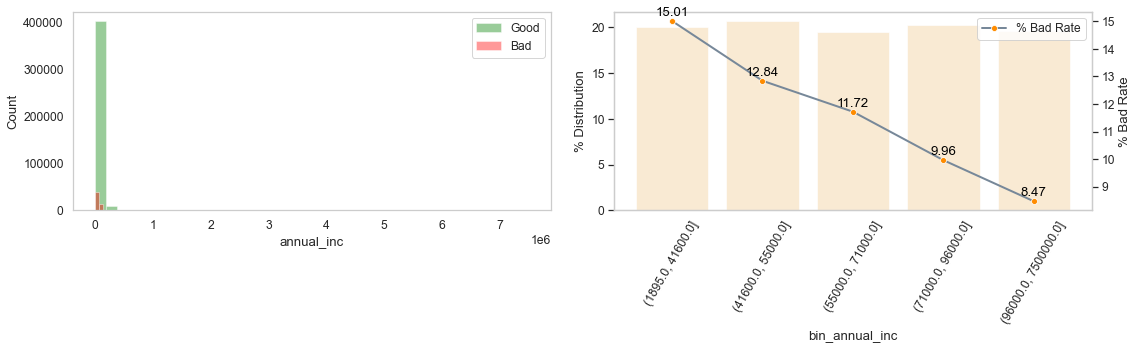

In [8]:
# df_age = df[['loan_status', 'person_age']]
# df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0)
# df_age = df_age.groupby('bin_person_age').agg({'loan_status': ['count', 'sum']})
# df_age.columns = df_age.columns.map('_'.join)
# df_age['dist'] = df_age['loan_status_count']/df_age['loan_status_count'].sum()
# df_age['bad_rate'] = df_age['loan_status_sum']/df_age['loan_status_count']
# df_age = df_age.reset_index()
# df_age



df = df_fill.copy()

df_annual_inc = df[['good_bad', 'annual_inc']]
df_annual_inc['bin_annual_inc'] = pd.qcut(df_annual_inc['annual_inc'].astype(float), q = 5, duplicates = 'drop', precision = 0)
df_annual_inc = df_annual_inc.groupby('bin_annual_inc').agg({'good_bad' : ['count', 'sum']})
df_annual_inc.columns = df_annual_inc.columns.map('_'.join)
df_annual_inc['dist'] = df_annual_inc['good_bad_count']/df_annual_inc['good_bad_count'].sum()
df_annual_inc['bad_rate'] = df_annual_inc['good_bad_sum']/df_annual_inc['good_bad_count']
df_annual_inc = df_annual_inc.reset_index()

sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(16,5))

### First figure is distribution plot ###

sns.distplot(df.loc[df['good_bad'] == 0, 'annual_inc'], kde=False, bins=40,
            label = 'Good', color = 'green', ax = ax[0])
sns.distplot(df.loc[df['good_bad'] == 1, 'annual_inc'], kde=False, bins=20,
             label = 'Bad', color = 'red', ax = ax[0])

### Second figure is bar plot + line chart ###

### y axis (left) is bar plot ###
sns.barplot(df_annual_inc['bin_annual_inc'], df_annual_inc['dist']*100, data = df_annual_inc, color='navajowhite', alpha=.6,
            ax = ax[1])

### y axis (right) is line chart ###
ax2 = ax[1].twinx()
ax2 = sns.lineplot(data=df_annual_inc, x=df_annual_inc.index, y=df_annual_inc['bad_rate']*100\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='lightslategray', 
                  linewidth=2, label='% Bad Rate')
for x,y in zip(df_annual_inc.index, df_annual_inc['bad_rate']*100):
          label = "{:.2f}".format(y)
          plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 

ax[0].legend()
ax[0].grid(False)
ax[1].grid(False)
ax2.grid(False)
ax[0].set_ylabel('Count')
ax[1].set_ylabel('% Distribution')
ax[1].set_xticklabels(df_annual_inc['bin_annual_inc'], rotation = 60)
ax2.set_ylabel('% Bad Rate')
plt.tight_layout() 
plt.show();

In [9]:
def risk_rank(df_fill):
    
    df = df_fill.copy()

    for col in df.columns:
        
        if 'int' in str(df[col].dtypes) or 'float' in str(df[col].dtypes):
        
            df_bin = df[['good_bad', col]]
            df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
            df_bin = df_bin.groupby(f'bin_{col}').agg({'good_bad' : ['count', 'sum']})
            df_bin.columns = df_bin.columns.map('_'.join)
            df_bin['dist'] = df_bin['good_bad_count']/df_bin['good_bad_count'].sum()
            df_bin['bad_rate'] = df_bin['good_bad_sum']/df_bin['good_bad_count']
            df_bin = df_bin.reset_index()

            sns.set(font_scale=1.1)
            sns.set_style("whitegrid")
            fig, ax = plt.subplots(1, 2, figsize=(16,5))

            ### First figure is distribution plot ###

            sns.distplot(df.loc[df['good_bad'] == 0, 'annual_inc'], kde=False, bins=40,
                        label = 'Good', color = 'green', ax = ax[0])
            sns.distplot(df.loc[df['good_bad'] == 1, 'annual_inc'], kde=False, bins=20,
                         label = 'Bad', color = 'red', ax = ax[0])

            ### Second figure is bar plot + line chart ###

            ### y axis (left) is bar plot ###
            sns.barplot(df_bin[f'bin_{col}'], df_bin['dist']*100, data = df_bin, color='navajowhite', alpha=.6,
                        ax = ax[1])

            ### y axis (right) is line chart ###
            ax2 = ax[1].twinx()
            ax2 = sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['bad_rate']*100\
                               , marker='o',\
                              markerfacecolor='darkorange', markersize=6, color='lightslategray', 
                              linewidth=2, label='% Bad Rate')
            for x,y in zip(df_bin.index, df_bin['bad_rate']*100):
                      label = "{:.2f}".format(y)
                      plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 

            ax[0].legend()
            ax[0].grid(False)
            ax[1].grid(False)
            ax2.grid(False)
            ax[0].set_ylabel('Count')
            ax[1].set_ylabel('% Distribution')
            ax[1].set_xticklabels(df_bin[f'bin_{col}'], rotation = 60)
            ax2.set_ylabel('% Bad Rate')
            plt.tight_layout() 
            plt.show();

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

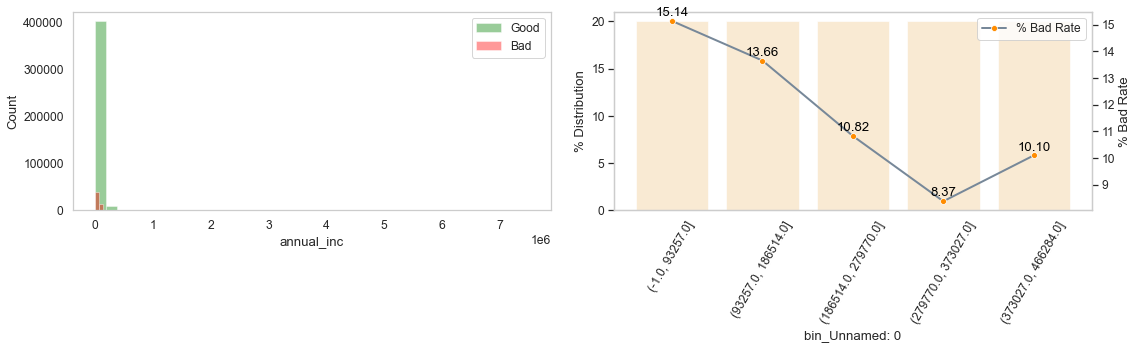

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

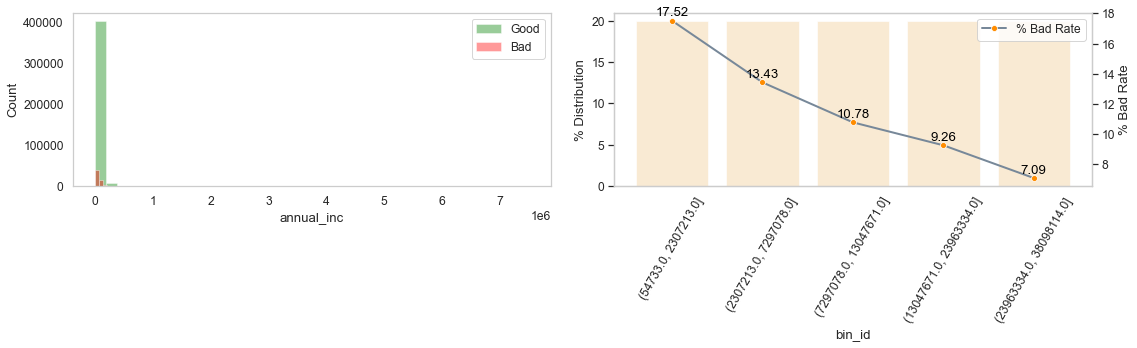

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

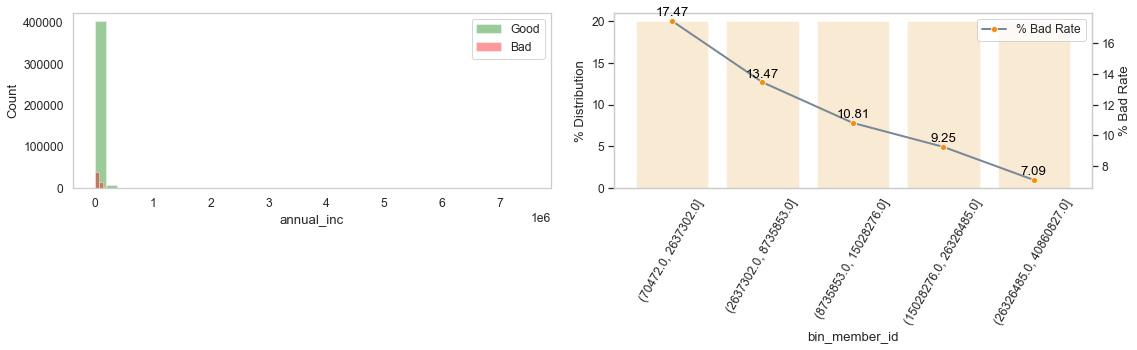

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

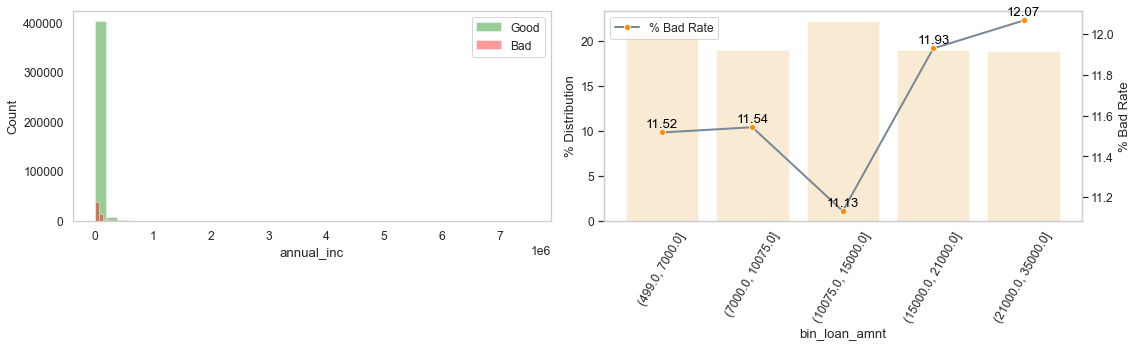

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

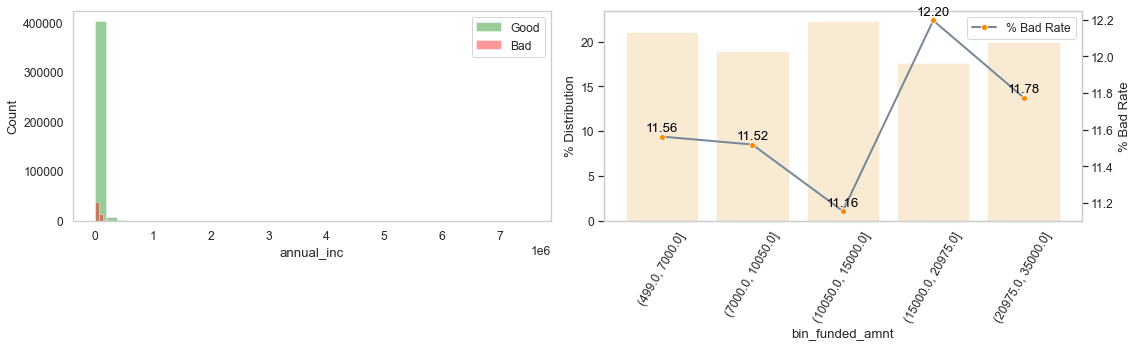

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

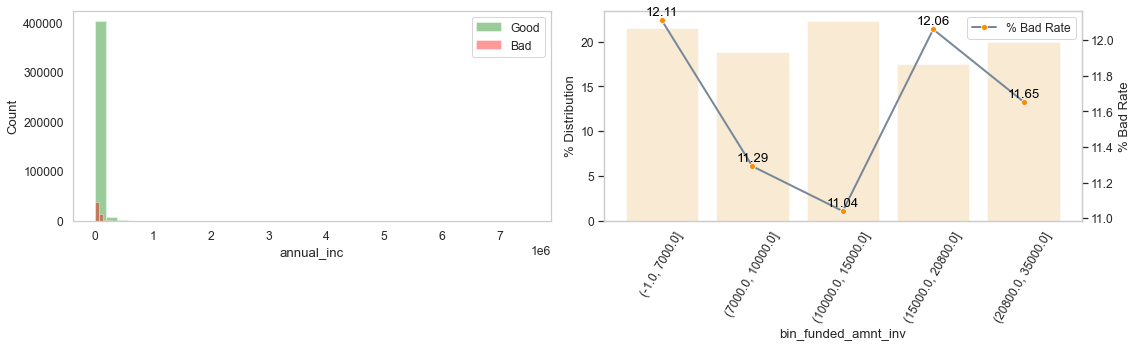

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

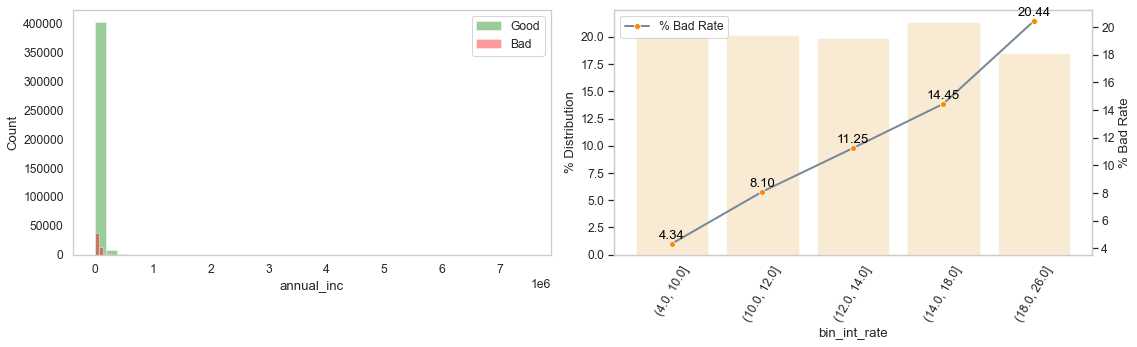

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

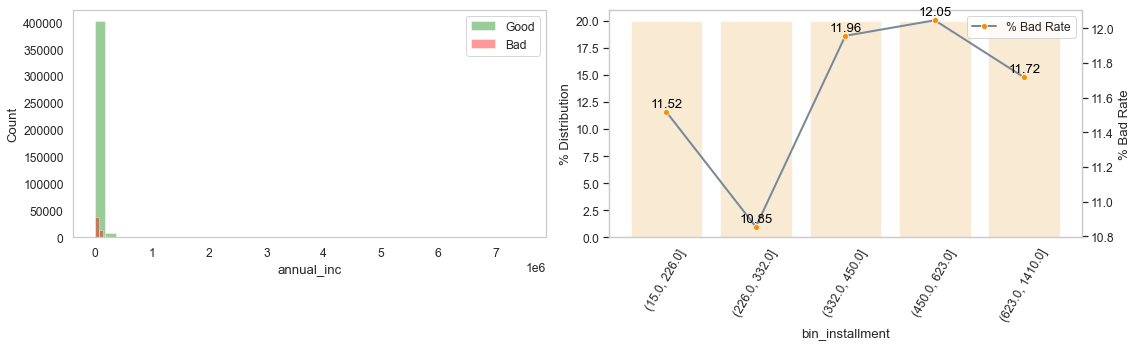

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

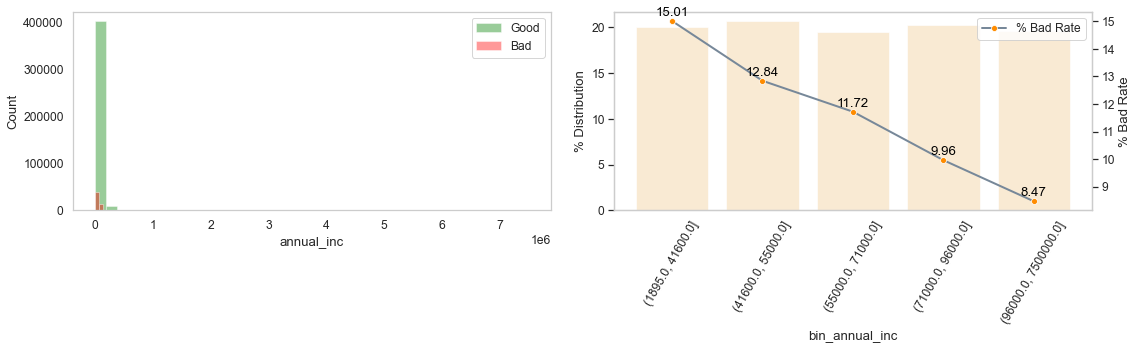

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

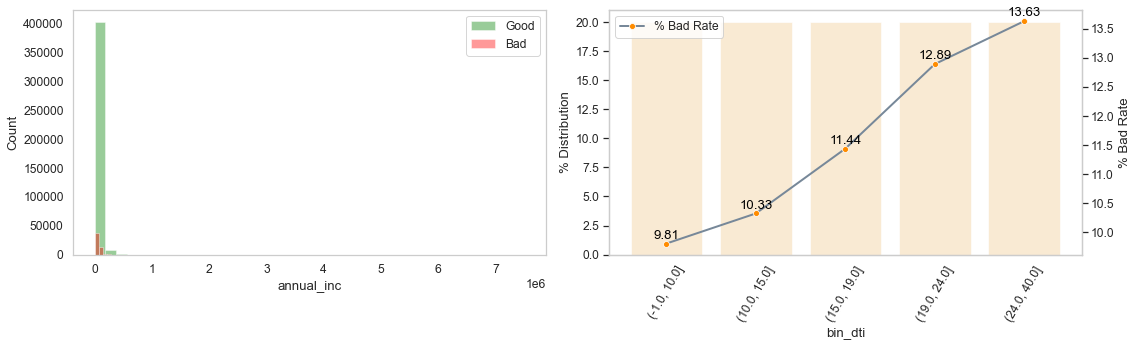

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

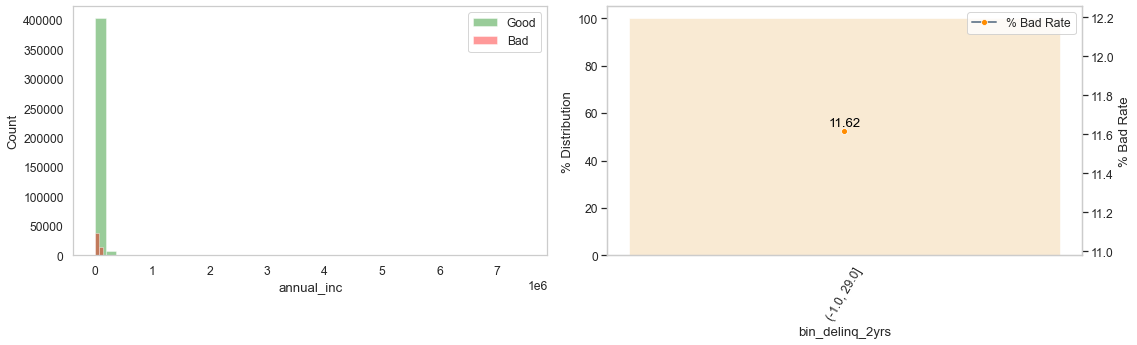

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

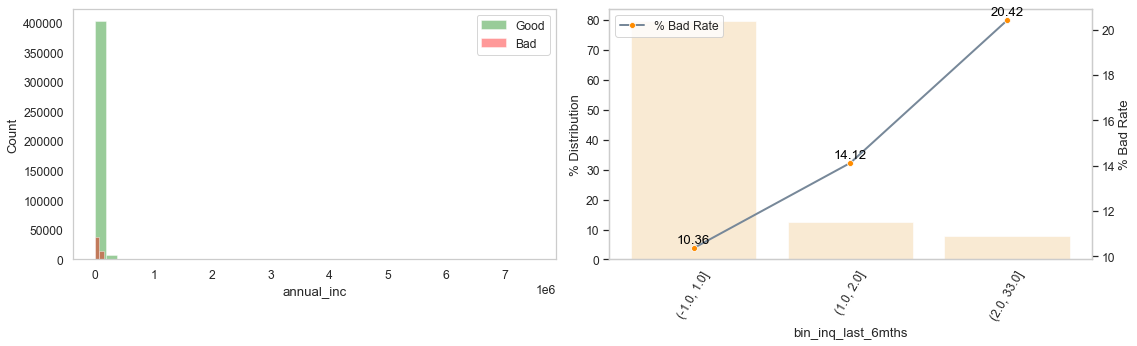

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

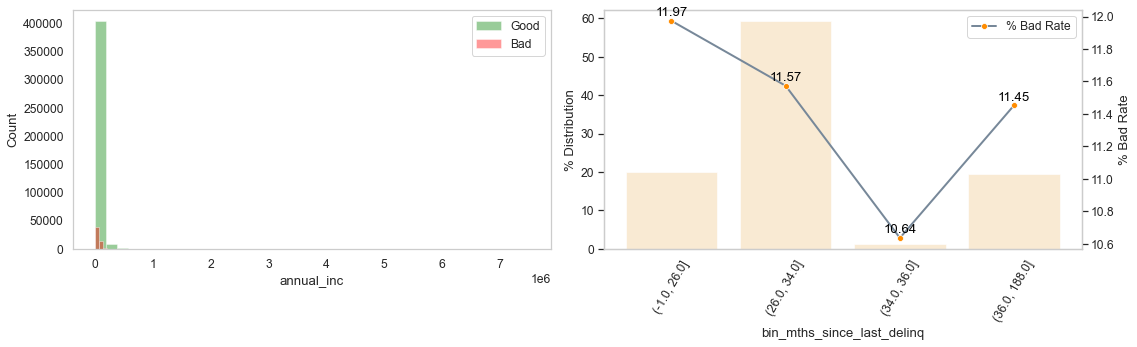

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

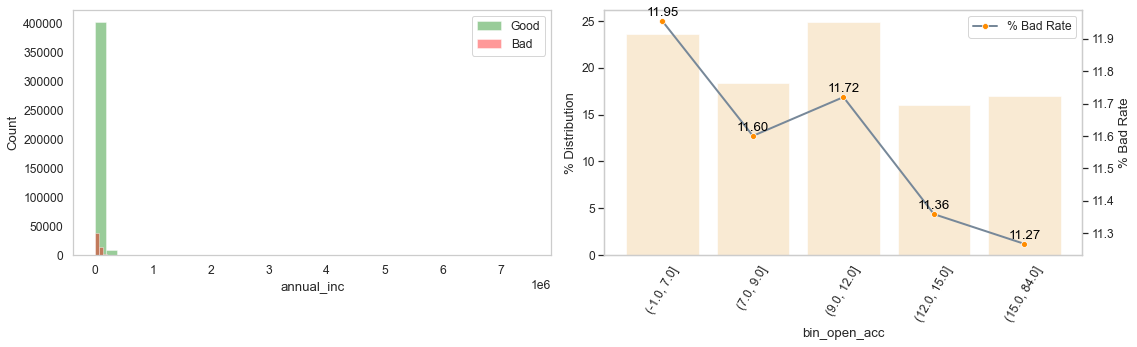

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

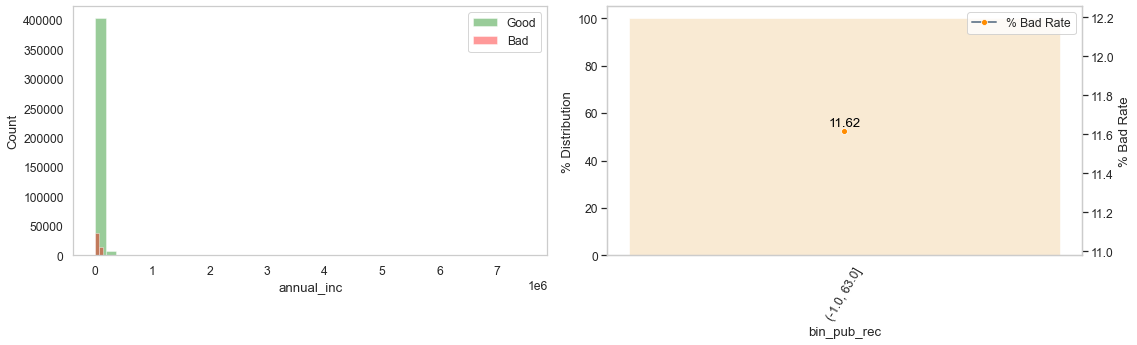

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

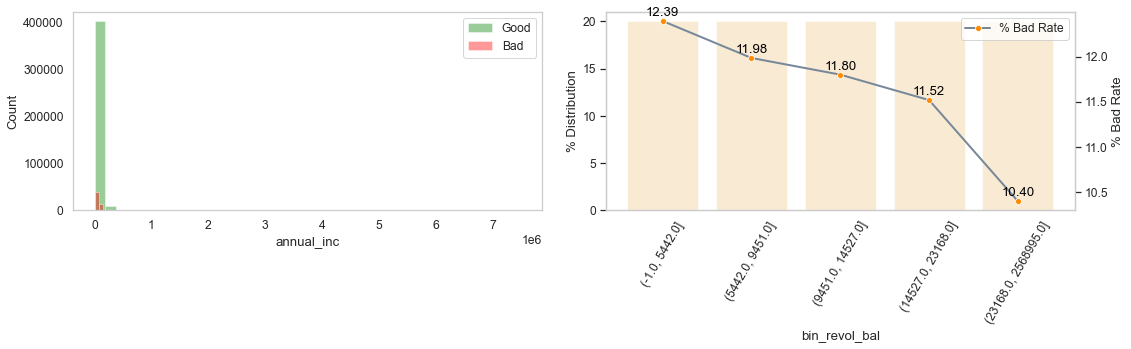

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

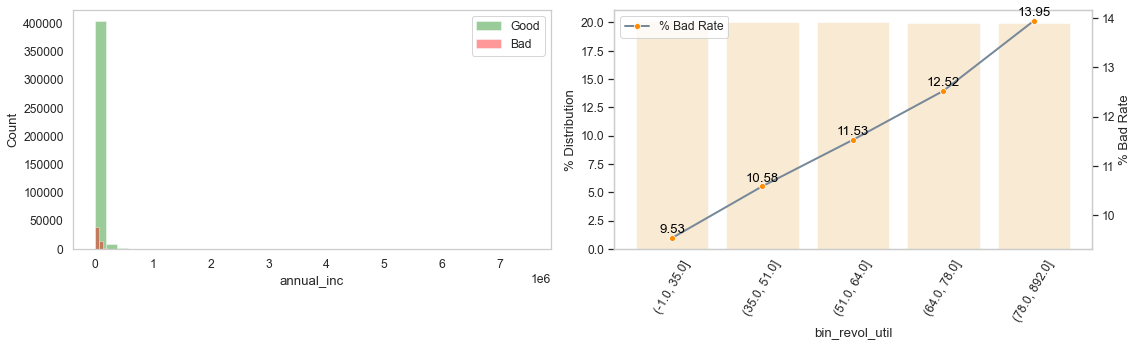

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

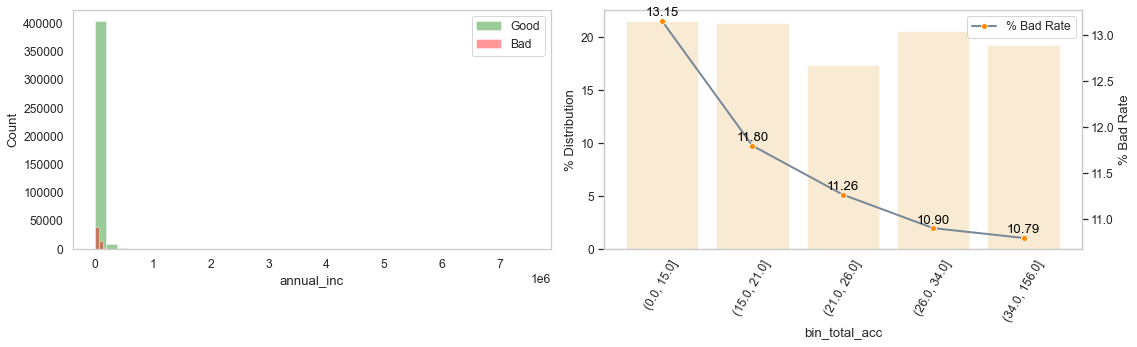

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

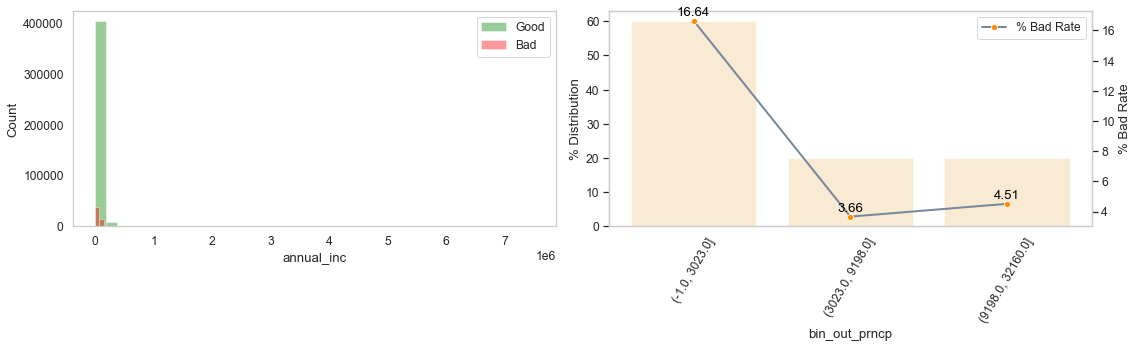

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

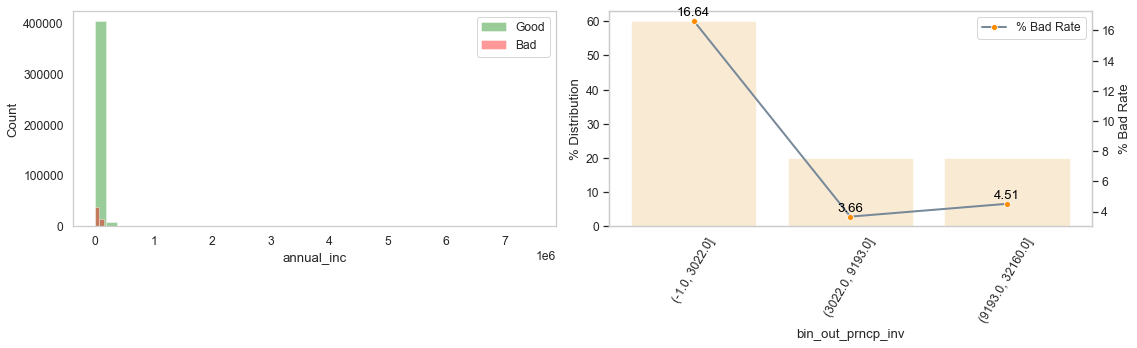

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

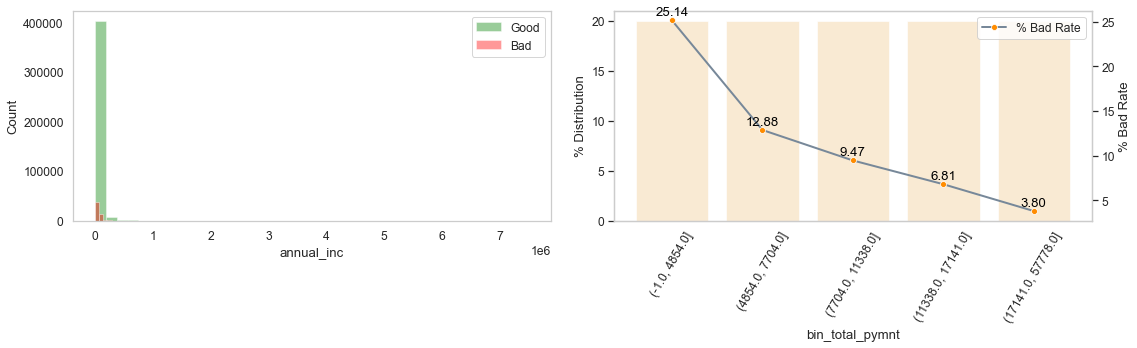

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

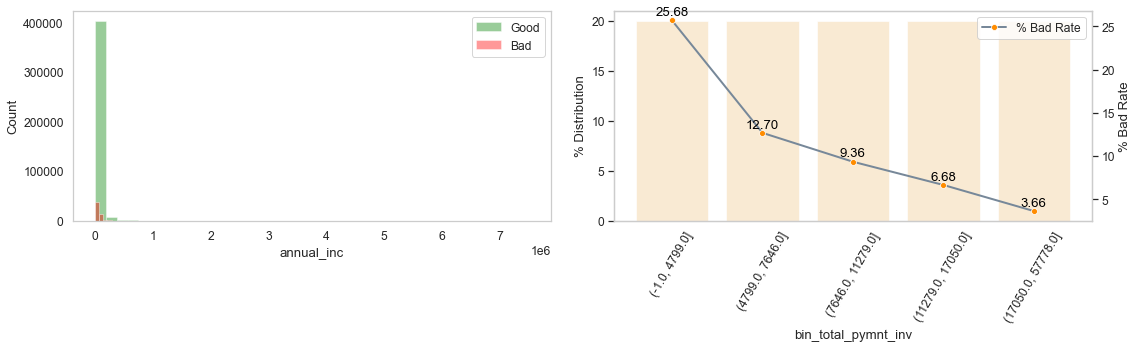

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

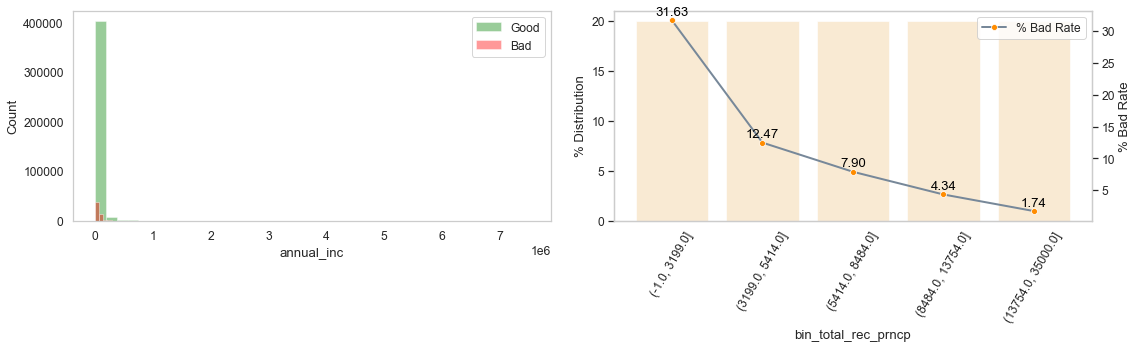

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

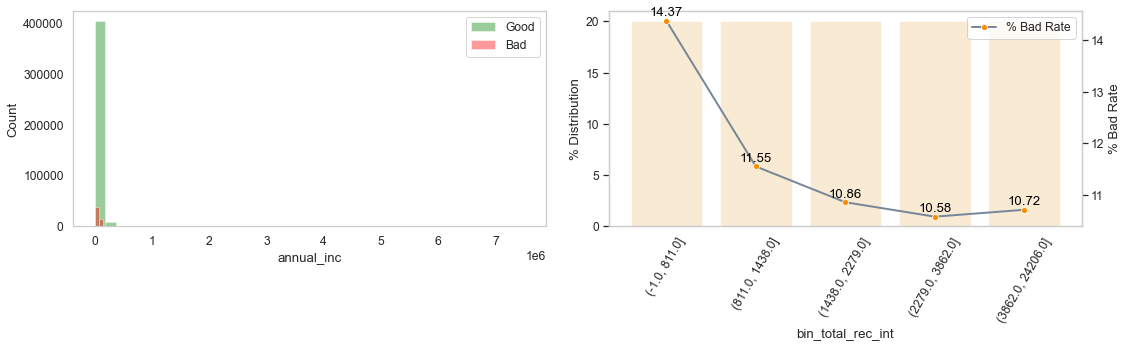

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

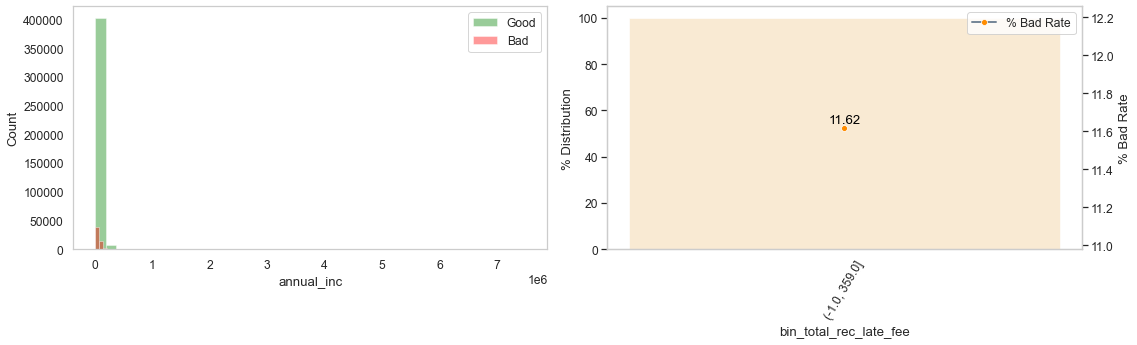

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

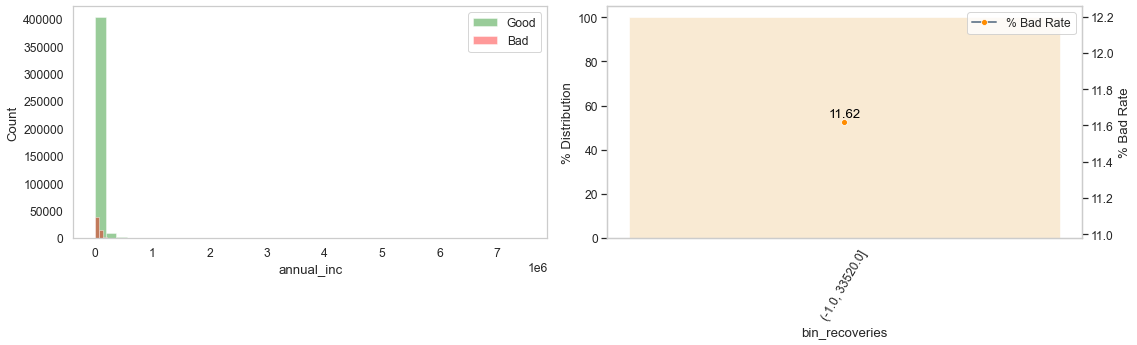

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

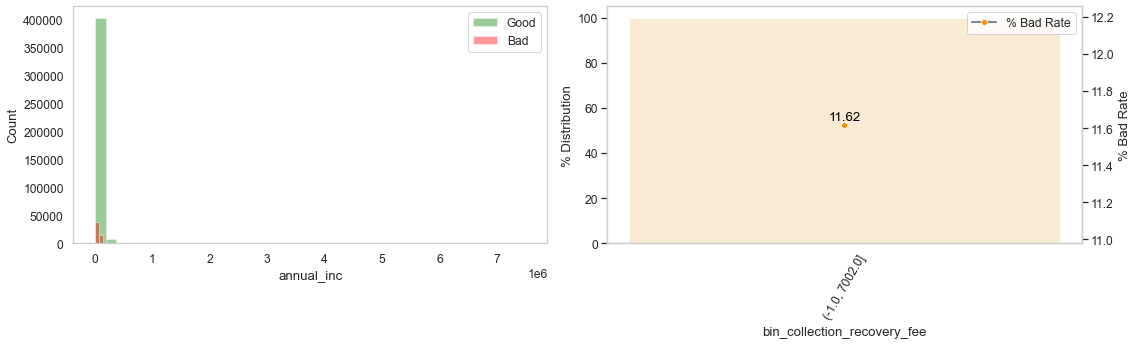

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

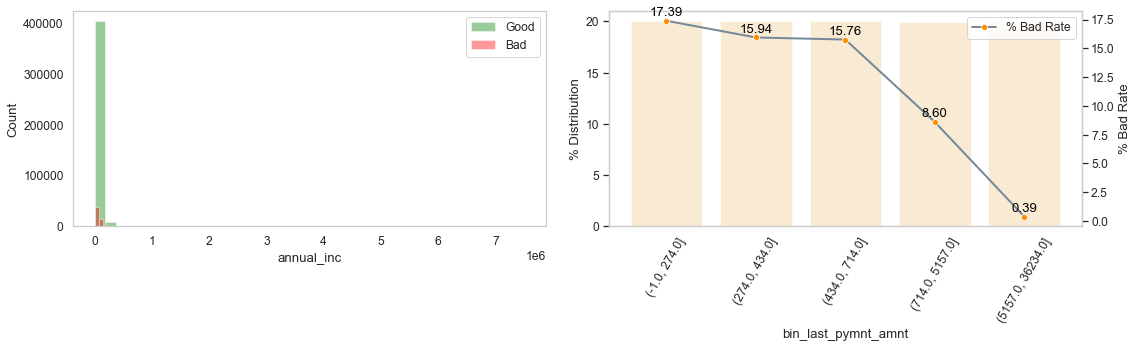

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

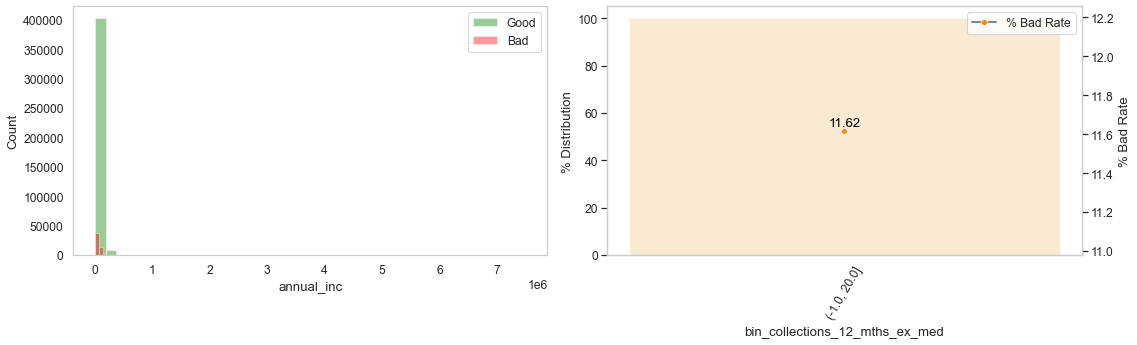

<ipython-input-9-ac7fd5316b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

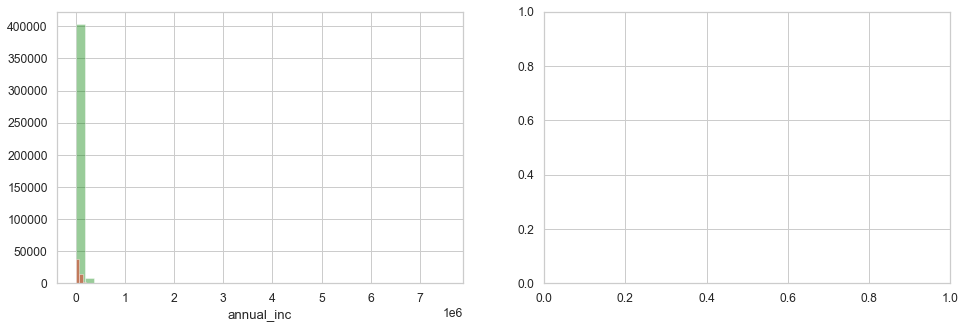

In [10]:
risk_rank(df_fill)

**Numerical variables**

Feature which is risk-ranking (Exclude id and member_id)

1. int_rate (low int_rate, low bad rate)
2. annual_inc (low annual_inc, high bad rate)
3. dti (low debt_to_income, low bad rate)
4. inq_last_6_mths (low inq_last_6_mths, low bad_rate)
5. revel_bal (low reval_bal, high bad_rate)
6. revol_util (low reval_util, low bad_rate)
7. total_acc (low total_acc, high bad_rate)
8. total_pymnt (low total_pymnt, high bad rate)
9. total_pymnt_inv (low total_pymnt_inv, high bad rate)
10. total_rec_prncp (low total_rec_prncp, high bad rate)

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

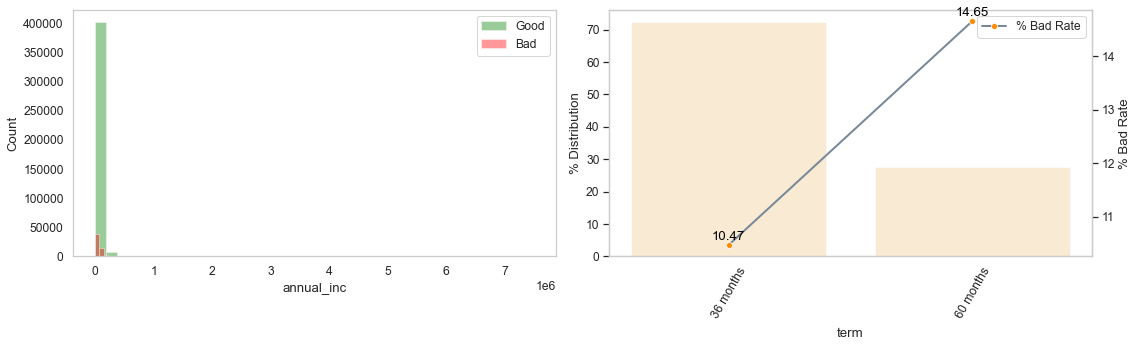

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

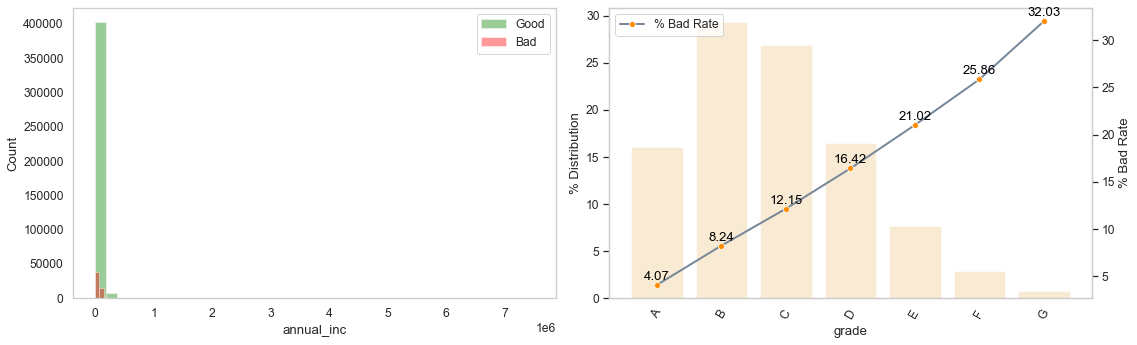

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

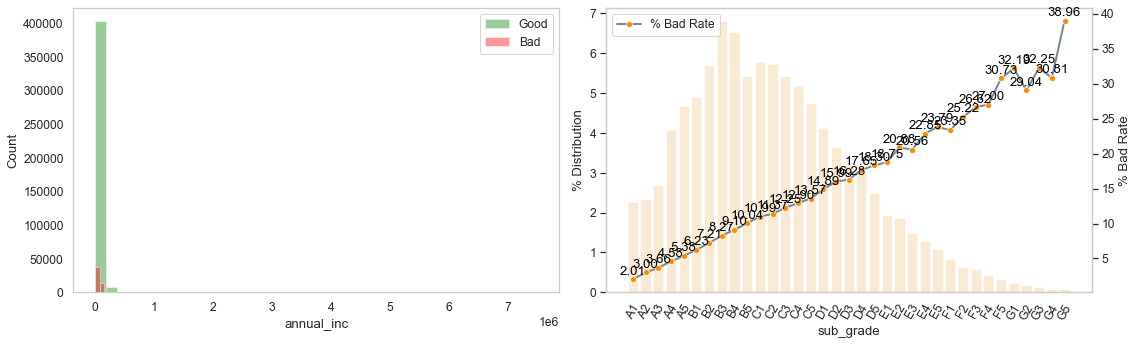

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

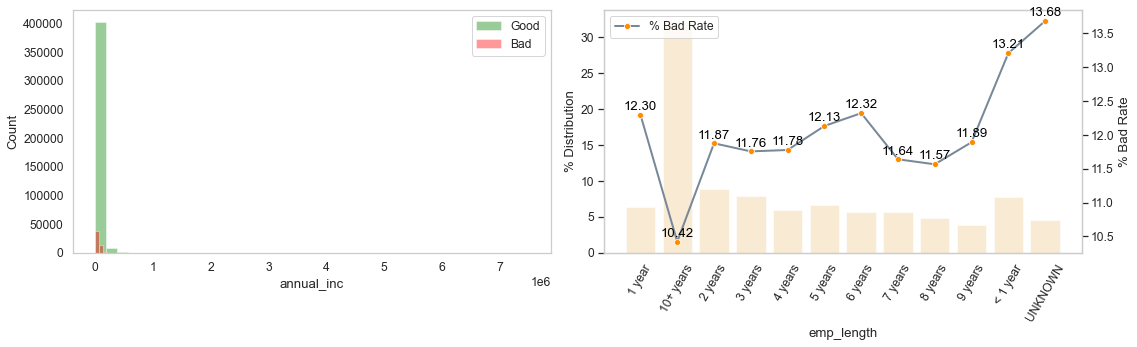

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

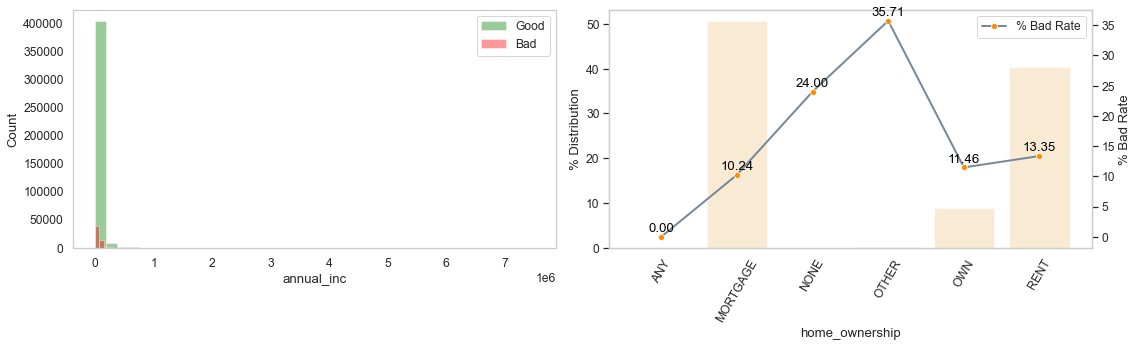

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

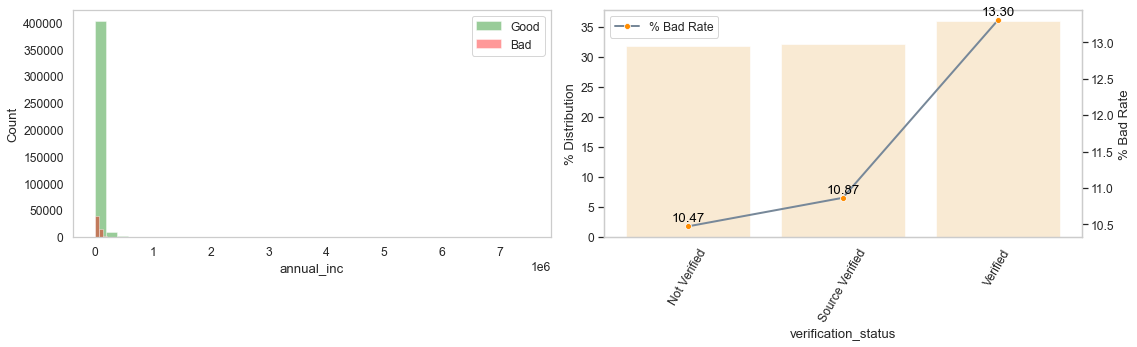

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

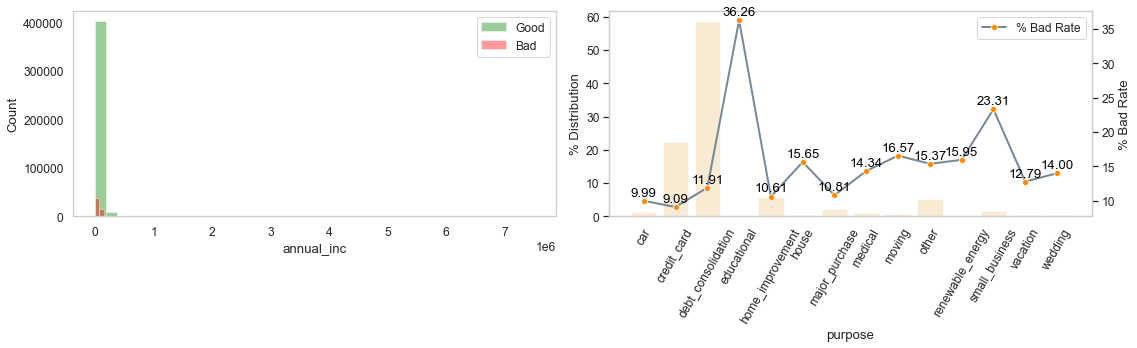

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

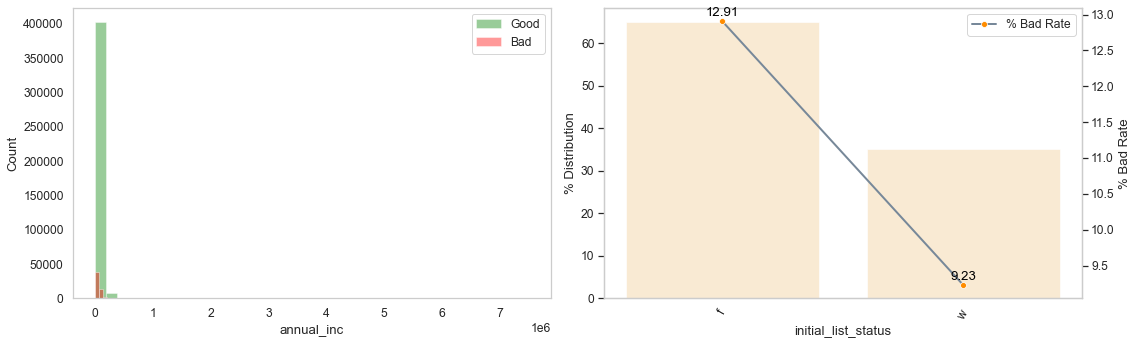

In [24]:
cat_col = [i for i in df_fill.columns if str(df_fill[i].dtypes) == 'object']

for i in cat_col:
            
            df_bin = df_fill.copy()
            df_bin = df_bin.groupby(i).agg({'good_bad' : ['count', 'sum']})
            df_bin.columns = df_bin.columns.map('_'.join)
            df_bin['dist'] = df_bin['good_bad_count']/df_bin['good_bad_count'].sum()
            df_bin['bad_rate'] = df_bin['good_bad_sum']/df_bin['good_bad_count']
            df_bin = df_bin.reset_index()

            sns.set(font_scale=1.1)
            sns.set_style("whitegrid")
            fig, ax = plt.subplots(1, 2, figsize=(16,5))

            ### First figure is distribution plot ###

            sns.distplot(df.loc[df['good_bad'] == 0, 'annual_inc'], kde=False, bins=40,
                        label = 'Good', color = 'green', ax = ax[0])
            sns.distplot(df.loc[df['good_bad'] == 1, 'annual_inc'], kde=False, bins=20,
                         label = 'Bad', color = 'red', ax = ax[0])

            ### Second figure is bar plot + line chart ###

            ### y axis (left) is bar plot ###
            sns.barplot(df_bin[i], df_bin['dist']*100, data = df_bin, color='navajowhite', alpha=.6,
                        ax = ax[1])

            ### y axis (right) is line chart ###
            ax2 = ax[1].twinx()
            ax2 = sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['bad_rate']*100\
                               , marker='o',\
                              markerfacecolor='darkorange', markersize=6, color='lightslategray', 
                              linewidth=2, label='% Bad Rate')
            for x,y in zip(df_bin.index, df_bin['bad_rate']*100):
                      label = "{:.2f}".format(y)
                      plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 

            ax[0].legend()
            ax[0].grid(False)
            ax[1].grid(False)
            ax2.grid(False)
            ax[0].set_ylabel('Count')
            ax[1].set_ylabel('% Distribution')
            ax[1].set_xticklabels(df_bin[i], rotation = 60)
            ax2.set_ylabel('% Bad Rate')
            plt.tight_layout() 
            plt.show();

**Categorical variables**

1. Term

- There are more bad rate in long-term loan (60 months) than short-term loan (36 months)

2. Grade 

- We obviously acknowledge that ranks of borrower are in order from good to bad as A-G.
- There are less default in premium-grade customers.

3. Sub_grade

- To break down into subclass of Grade, rank 1-5 in are considered to seperate customers in the same class.
- In high subranks, there is an order in risk ranking.
- However, after rank F5, the risk rank are spread disorderly (but the trend remains risk-ranking)

4. emp_length (may be employment length)

- We clearly see that in < 1 year and UNKNOWN, bad rate are very high. (Fresh-graduated or self employment maybe)
- In addition, customers with emp_length more than 10 years are less default compared with lower emp_length (A strong and secured job)

5. homeownership

- NONE and OTHER are more default.

6. verification status

- Verified borrowers are more default.

7. purpose

- There are more bad rate in educational and small business purposes and less in credit_card and car.



In [82]:
def woe(df):
    
    df_ = pd.DataFrame()
    
    num_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
               'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
               'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
               'last_pymnt_amnt']
    
    cat_columns = [i for i in df_fill.columns if str(df_fill[i].dtypes) == 'object']

    
    lookup_woe_df = {}
    
    for col in num_columns:
        
        if 'int' in str(df[col].dtypes) or 'float' in str(df[col].dtypes):
            
            df_bin = df[['good_bad', col]]
            df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
            df_bin = df_bin.groupby(f'bin_{col}').agg({'good_bad' : ['count', 'sum']})
            df_bin.columns = df_bin.columns.map('_'.join)
            
            df_bin = df_bin.rename(columns = {'good_bad_sum' : 'count_bad' , 'good_bad_count' : 'total'})
            df_bin['count_good'] = df_bin['total'] - df_bin['count_bad']
            df_bin['dist_bad'] = df_bin['count_bad']/df_bin['count_bad'].sum()
            df_bin['dist_good'] = df_bin['count_good']/df_bin['count_good'].sum()
            
            df_bin['woe'] = np.log(df_bin['dist_bad']/df_bin['dist_good'])
            
            df_bin['dist_bad-dist_good'] = df_bin['dist_bad'] - df_bin['dist_good']
            
            df_bin['iv'] = df_bin['woe']*df_bin['dist_bad-dist_good']
            
            iv_sum = df_bin['iv'].sum()
            
            print(col)
            df_ = df_.append({'Feature' : col, 'iv' : iv_sum}, ignore_index = True)
            
            lookup_woe_df[col] = dict([(row[f'bin_{col}'], row['woe']) for index, row in df_bin.reset_index().iterrows()])
            
    for col in cat_columns:
        
            df_bin = df[['good_bad', col]]
            df_bin = df_bin.groupby(col).agg({'good_bad' : ['count', 'sum']})
            df_bin.columns = df_bin.columns.map('_'.join)
            
            df_bin = df_bin.rename(columns = {'good_bad_sum' : 'count_bad' , 'good_bad_count' : 'total'})
            df_bin['count_good'] = df_bin['total'] - df_bin['count_bad']
            df_bin['dist_bad'] = df_bin['count_bad']/df_bin['count_bad'].sum()
            df_bin['dist_good'] = df_bin['count_good']/df_bin['count_good'].sum()
            
            df_bin['woe'] = np.log(df_bin['dist_bad']/df_bin['dist_good'])
            
            df_bin['dist_bad-dist_good'] = df_bin['dist_bad'] - df_bin['dist_good']
            
            df_bin['iv'] = df_bin['woe']*df_bin['dist_bad-dist_good']
            
            iv_sum = df_bin['iv'].sum()
            
            print(col)
            df_ = df_.append({'Feature' : col, 'iv' : iv_sum}, ignore_index = True)
        
            lookup_woe_df[col] = dict([(row[f'{col}'], row['woe']) for index, row in df_bin.reset_index().iterrows()])
        
    
    df = df.replace(float('inf'), 0)
    return df_.sort_values(by = 'iv', ascending = False, ignore_index = True), lookup_woe_df
            
            
        
        

In [83]:
iv_df, lookup_woe_df = woe(df_fill)

<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


loan_amnt


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


funded_amnt
funded_amnt_inv


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


int_rate


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


installment
annual_inc


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

dti
inq_last_6mths


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


mths_since_last_delinq
open_acc


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


revol_bal


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


revol_util
total_acc


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)
<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


out_prncp


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


out_prncp_inv


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


total_pymnt


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


total_pymnt_inv


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


total_rec_prncp


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


total_rec_int


<ipython-input-82-baa0d14cc1a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[f'bin_{col}'] = pd.qcut(df_bin[col].astype(float), q = 5, duplicates = 'drop', precision = 0)


last_pymnt_amnt
term
grade
sub_grade
emp_length
home_ownership


C:\Users\sorra\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


verification_status
purpose
initial_list_status


In [84]:
lookup_woe_df['loan_amnt']

{Interval(499.0, 7000.0, closed='right'): -0.009881950141502867,
 Interval(7000.0, 10075.0, closed='right'): -0.007347703826960387,
 Interval(10075.0, 15000.0, closed='right'): -0.04836345678094616,
 Interval(15000.0, 21000.0, closed='right'): 0.030057868433393645,
 Interval(21000.0, 35000.0, closed='right'): 0.043070735417968034}

# Modeling

In [156]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression

def generate_woe_df(df, lookup_woe_df):
    
    to_drop = ['Unnamed: 0', 'id', 'member_id']
    df_ = df.copy()
    df_ = df.drop(columns = to_drop)
    
    df_woe = pd.DataFrame()
    
    num_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
               'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
               'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
               'last_pymnt_amnt']
    
    cat_columns = [i for i in df_fill.columns if str(df_fill[i].dtypes) == 'object']
    
    for i in num_columns:
          
        
        df_woe[f'woe_{i}'] = pd.qcut(df_[i].astype(float), q=5, duplicates='drop', precision=0)
        df_woe[f'woe_{i}'] = df_woe[f'woe_{i}'].apply(lambda x: lookup_woe_df[i][x]).astype(float)
        
    for i in cat_columns:
           
#         df_woe[f'woe_{i}'] = pd.qcut(df_[i].astype(float), q=5, duplicates='drop', precision=0)
        df_woe[f'woe_{i}'] = df_[f'{i}'].apply(lambda x: lookup_woe_df[i][x]).astype(float)
    
    df_woe['good_bad'] = df_['good_bad']
    
    df_woe = df_woe.replace([np.inf, -np.inf], 0)
    
    return df_woe
    
def grid_search_logistic_regression(df_woe):
    
    param_grid = {'classifier_penalty' : ['l1', 'l2'],
                    'classifier_C' : np.logspace(-2, 2, 3),
                    'classifier__solver' : ['liblinear']}
    
    X, y = df_woe.iloc[:,:-1], df_woe['good_bad']
    skf = StratifiedKFold(n_splits=3)
    
    best_params = {}
    best_acc = 0
    
    count_fold = 1
    
    for penalty in param_grid['classifier_penalty']:
        for C in param_grid['classifier_C']:
            
            clf = LogisticRegression(penalty = penalty, C = C, solver = 'liblinear')
            acc = []
            
            print(f'Penalty : {penalty} , C : {C}')
            
            for train_index, test_index in skf.split(X, y):
                
                
                print(f'Fold : {count_fold}')
    
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                

                
                clf.fit(X_train, y_train)
                
                y_pred = clf.predict(X_test)
                
                acc.append(np.sum(y_test == y_pred)/y_test.shape[0])
                
                count_fold +=1
                
            count_fold = 1
            
            acc = np.mean(acc)
            
            if acc > best_acc:
                
                best_params = {'penalty' : penalty, 'C' : C}
                best_acc = acc
                
    print('======================')
    print(best_params)
    print(best_acc)
        
                
                
        
        
            
        
        

In [150]:
# df_woe = generate_woe_df(df_fill, lookup_woe_df)

grid_search_logistic_regression(df_woe)

Penalty : l1 , C : 0.01
Fold : 1
Fold : 2
Fold : 3
Penalty : l1 , C : 1.0
Fold : 1
Fold : 2
Fold : 3
Penalty : l1 , C : 100.0
Fold : 1
Fold : 2
Fold : 3
Penalty : l2 , C : 0.01
Fold : 1
Fold : 2
Fold : 3
Penalty : l2 , C : 1.0
Fold : 1
Fold : 2
Fold : 3
Penalty : l2 , C : 100.0
Fold : 1
Fold : 2
Fold : 3
{'penalty': 'l2', 'C': 100.0}
0.9248957370853219


## Original woe features

In [230]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report

def roc_gini(y, y_pred_proba):


    assert y.shape == y_pred_proba.shape
    
    fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
    auc = metrics.roc_auc_score(y, y_pred_proba)
    gini = (2 * auc - 1)*100

    fig = plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', label='%s AUC = %0.4f, Gini = %0.2f' % ('Model: ', auc,  gini), 
           linewidth=2.5)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right',fontsize='small')
    plt.grid(False)
    plt.show()
    
def logistic_reg(df_woe):
    
    X_train, X_test, y_train, y_test = train_test_split(df_woe.iloc[:,:-1], 
                                                        df_woe['good_bad'], 
                                                        random_state = 42,
                                                        test_size = 0.2,
                                                        stratify = df_woe['good_bad'])
    
    
    clf = LogisticRegression(penalty = 'l2', C = 100, solver = 'liblinear')
    
    clf.fit(X_train, y_train)
    
    y_pred_proba = clf.predict_proba(X_test)
    
#     print(y_pred_proba.shape, y_test.shape)
    
#     return y_test, y_pred_proba
    
    roc_gini(y_test, y_pred_proba[:,1])
    
    return y_test, y_pred_proba, clf

    


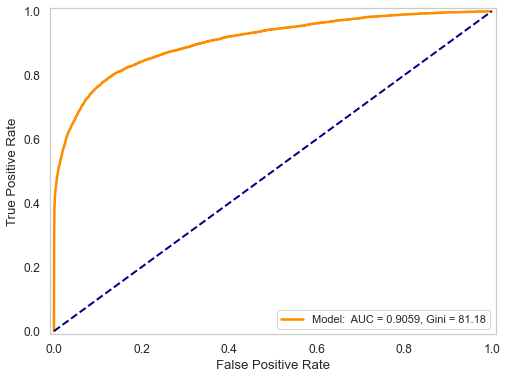

In [231]:
y_t, y_p, model = logistic_reg(df_woe)

In [240]:
list(zip(df_woe.columns, model.coef_[0]))

[('woe_loan_amnt', 31.537306570523025),
 ('woe_funded_amnt', 23.925256138146562),
 ('woe_funded_amnt_inv', -41.728124475096024),
 ('woe_int_rate', -0.19865532590261656),
 ('woe_installment', 13.467560717356264),
 ('woe_annual_inc', -0.0963058276686537),
 ('woe_dti', 0.13192777598193245),
 ('woe_inq_last_6mths', 0.8746993850907945),
 ('woe_mths_since_last_delinq', 0.6870667448601997),
 ('woe_open_acc', -0.588769691104574),
 ('woe_revol_bal', -1.817775948031104),
 ('woe_revol_util', 0.03905762263438518),
 ('woe_total_acc', -0.21681954334487474),
 ('woe_out_prncp', 1.1923121974506545),
 ('woe_out_prncp_inv', 1.2109758324001725),
 ('woe_total_pymnt', -2.091378271758763),
 ('woe_total_pymnt_inv', 2.169790935164143),
 ('woe_total_rec_prncp', 1.712456234341782),
 ('woe_total_rec_int', -1.3229371823598295),
 ('woe_last_pymnt_amnt', 0.8932888459177869),
 ('woe_term', -0.5073478251254455),
 ('woe_grade', -0.04196593199657151),
 ('woe_sub_grade', 0.696759661501618),
 ('woe_emp_length', 0.38246009

In [242]:
iv_df

,Feature,iv
0,home_ownership,inf
1,total_rec_prncp,1.058444
2,last_pymnt_amnt,0.902903
3,total_pymnt_inv,0.528213
4,total_pymnt,0.497383
5,out_prncp_inv,0.456415
6,out_prncp,0.456384
7,sub_grade,0.333396
8,grade,0.308261
9,int_rate,0.300303


In [201]:
print(classification_report(y_t, np.argmax(y_p, axis = 1)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     82422
           1       0.88      0.50      0.64     10835

    accuracy                           0.93     93257
   macro avg       0.91      0.74      0.80     93257
weighted avg       0.93      0.93      0.93     93257



## Selected features

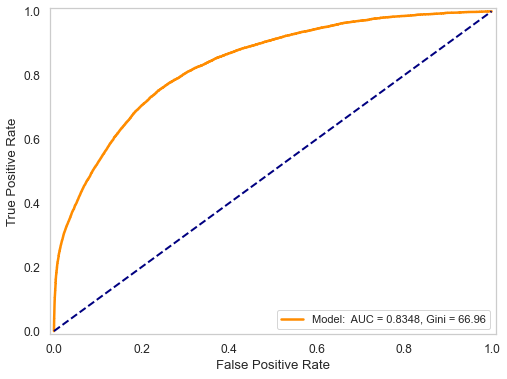

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     82422
           1       0.72      0.25      0.37     10835

    accuracy                           0.90     93257
   macro avg       0.82      0.62      0.66     93257
weighted avg       0.89      0.90      0.88     93257



In [245]:
selected_columns = ['woe_int_rate', 'woe_annual_inc', 'woe_dti', 'woe_inq_last_6mths', 'woe_revol_bal',
                    'woe_revol_util', 'woe_total_acc', 'woe_total_pymnt', 'woe_total_pymnt_inv', 'woe_total_rec_prncp',
                    'woe_term', 'woe_grade', 'woe_sub_grade', 'woe_emp_length', 'woe_home_ownership',
                    'woe_verification_status', 'woe_purpose', 
                    
                    'woe_loan_amnt', 'woe_funded_amnt', 'woe_funded_amnt_inv', 'woe_installment',
                    
                    'good_bad']

df_woe_feature_selection = df_woe[selected_columns]
y_t, y_p, model = logistic_reg(df_woe_feature_selection)
print(classification_report(y_t, np.argmax(y_p, axis = 1)))

## Oversampling using SMOTE on default class (1)

In [252]:
from imblearn.over_sampling import SMOTE

def logistic_reg_with_SMOTE(df_woe):
    
    oversample = SMOTE()
    X, y = oversample.fit_resample(df_woe.iloc[:,:-1], df_woe['good_bad'])

    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        random_state = 42,
                                                        test_size = 0.2,
                                                        stratify = y)
    
    
    clf = LogisticRegression(C = 100, solver = 'liblinear')
    
    clf.fit(X_train, y_train)
    
    y_pred_proba = clf.predict_proba(X_test)
    
    roc_gini(y_test, y_pred_proba[:,1])
    
    df_grade = pd.DataFrame({'loan_status' : y_test, 
                             'PD' : y_pred_proba[:, 1], 
                             'Prediction' : np.argmax(y_pred_proba, axis = 1)})
    
    return df_grade

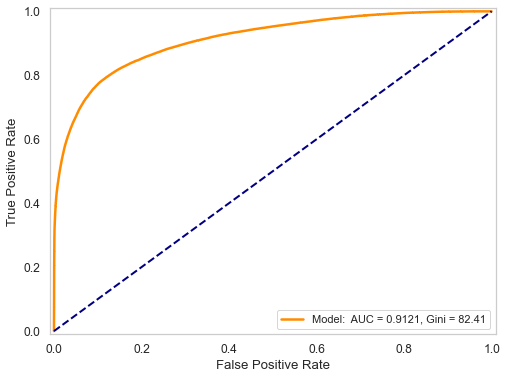

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     82423
           1       0.83      0.84      0.83     82422

    accuracy                           0.83    164845
   macro avg       0.83      0.83      0.83    164845
weighted avg       0.83      0.83      0.83    164845



In [255]:
df_grade = logistic_reg_with_SMOTE(df_woe)
print(classification_report(df_grade['loan_status'], df_grade['Prediction']))

## Oversampling using SMOTE on default class (1) with selected features

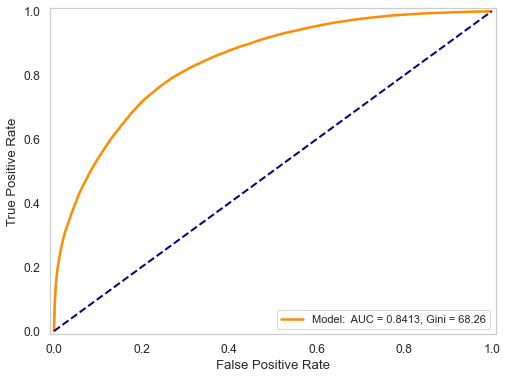

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     82423
           1       0.76      0.77      0.76     82422

    accuracy                           0.76    164845
   macro avg       0.76      0.76      0.76    164845
weighted avg       0.76      0.76      0.76    164845



In [248]:
selected_columns = ['woe_int_rate', 'woe_annual_inc', 'woe_dti', 'woe_inq_last_6mths', 'woe_revol_bal',
                    'woe_revol_util', 'woe_total_acc', 'woe_total_pymnt', 'woe_total_pymnt_inv', 'woe_total_rec_prncp',
                    'woe_term', 'woe_grade', 'woe_sub_grade', 'woe_emp_length', 'woe_home_ownership',
                    'woe_verification_status', 'woe_purpose', 
                    
                    'woe_loan_amnt', 'woe_funded_amnt', 'woe_funded_amnt_inv', 'woe_installment',
                    
                    'good_bad']

df_woe_feature_selection = df_woe[selected_columns]
y_t, y_p = logistic_reg_with_SMOTE(df_woe_feature_selection)
print(classification_report(y_t, np.argmax(y_p, axis = 1)))

Finally we acquired that using all features with SMOTE techniques get the best result

# Business suggestion

In [260]:
df_grade

,loan_status,PD,Prediction
393086,0,0.033541,0
786150,1,0.945527,1
181275,0,0.020041,0
21281,0,0.577414,1
756227,1,0.986601,1
...,...,...,...
539624,1,0.989599,1
718504,1,0.504485,1
25961,0,0.621816,1
684146,1,0.976036,1


In [282]:
df_grade['score_grade'] = pd.cut(df_grade['PD'],
                                 bins = [0, 0.05, 0.10, 0.15, 0.30, 0.50, 0.70, 1], 
                                 labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

report = df_grade.groupby('score_grade').agg({'loan_status' : ['count', 'sum']})
report.columns = report.columns.map('_'.join)
report['dist'] = report['loan_status_count']/report['loan_status_count'].sum()*100
report['bad_rate'] = report['loan_status_sum']/report['loan_status_count']*100
report = report.reset_index()

C:\Users\sorra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


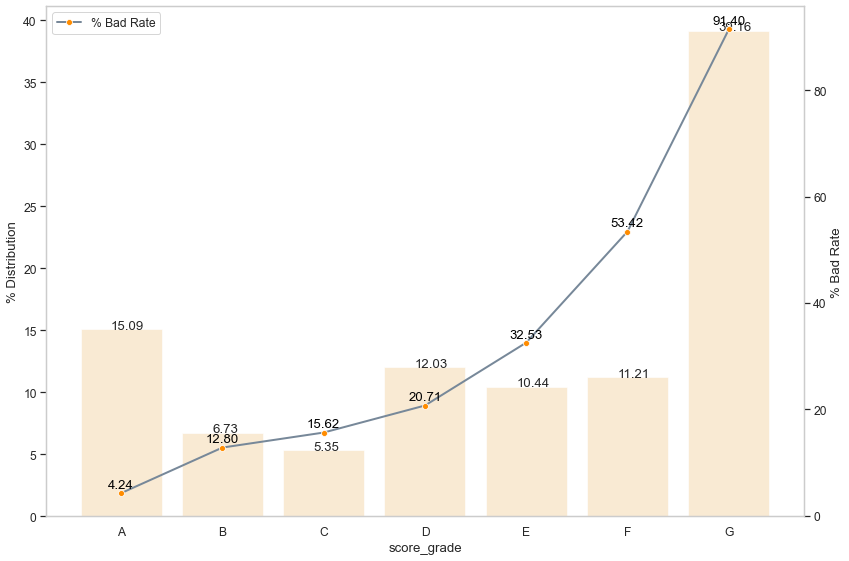

In [299]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(report['score_grade'], report['dist'], data = report,
            color = 'navajowhite', alpha = .6, ax = ax)

xlocs, xlabs = plt.xticks()
plt.xticks(xlocs, xlabs)
for i, v in enumerate(np.round(report['dist'], 2)):
    plt.text(xlocs[i] - 0.1 , v + 0.02, str(v))
    
ax2 = ax.twinx()
ax2 = sns.lineplot(data = report, x = report.index, y = report['bad_rate'],
                  marker = 'o', markerfacecolor = 'darkorange', markersize = 6,
                  color = 'lightslategray', linewidth = 2, label = '% Bad Rate')

for x,y in zip(report.index, report['bad_rate']):
    label = '{:.2f}'.format(y)
    plt.annotate(label, (x,y), textcoords = 'offset points', xytext = (0,5),
                ha = 'center', color = 'black')
    

ax.grid(False)
ax2.grid(False)

ax.set_ylabel('% Distribution')
ax2.set_ylabel('% Bad Rate')
plt.tight_layout() 
plt.show();